In [181]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

data = pd.read_csv("20151212.txt", sep = "\t", header = None)
data.columns = ["conn len", "service", "src bytes", "dst bytes", "conn numb", "Same srv rate", "Serror rate", "Srv serror rate", "Dst host count", "Dst host srv count", "Dst host same src port rate", "Dst host serror rate", "Dst host srv serror rate", "Conn state", "IDS detection", "Malware detection", "Ashula detection", "attack_flag", "src IP", "src port", "dst IP", "dst port", "start time", "proto"]

# slice dataset up to attack flag column, drop additional features
data = data.loc[:, :'attack_flag']

# drop software markers
data = data.drop(["IDS detection", "Malware detection", "Ashula detection"], axis=1)

In [182]:
data.tail(10)

,conn len,service,src bytes,dst bytes,conn numb,Same srv rate,Serror rate,Srv serror rate,Dst host count,Dst host srv count,Dst host same src port rate,Dst host serror rate,Dst host srv serror rate,Conn state,attack_flag
270065,0.692674,ssh,605,2605,3,1.0,0.0,0.0,100,98,0.0,0.0,0.0,RSTO,-1
270066,0.000348,dns,45,108,3,1.0,0.0,0.0,96,96,0.0,0.0,0.0,SF,-1
270067,0.712056,ssh,605,2605,2,1.0,0.0,0.0,100,98,0.0,0.0,0.0,RSTO,-1
270068,0.750099,ssh,605,2605,3,1.0,0.0,0.0,100,98,0.0,0.0,0.0,RSTO,-1
270069,0.000000,other,0,0,0,0.0,0.0,0.0,0,3,0.0,0.0,1.0,S0,-1
270070,0.000527,dns,45,108,3,1.0,0.0,0.0,96,96,0.0,0.0,0.0,SF,-1
270071,0.758028,ssh,605,2605,3,1.0,0.0,0.0,100,98,0.0,0.0,0.0,RSTO,-1
270072,0.000366,dns,45,108,2,1.0,0.0,0.0,96,96,0.0,0.0,0.0,SF,-1
270073,0.000370,dns,45,108,3,1.0,0.0,0.0,96,96,0.0,0.0,0.0,SF,-1
270074,0.647061,ssh,453,2537,3,1.0,0.0,0.0,100,98,0.0,0.0,0.0,S1,-1


In [183]:
data.shape

(270075, 15)

In [184]:
data.describe()

,conn len,src bytes,dst bytes,conn numb,Same srv rate,Serror rate,Srv serror rate,Dst host count,Dst host srv count,Dst host same src port rate,Dst host serror rate,Dst host srv serror rate,attack_flag
count,270075.000000,2.700750e+05,2.700750e+05,270075.000000,270075.000000,270075.000000,270075.000000,270075.000000,270075.000000,270075.000000,270075.000000,270075.000000,270075.000000
mean,0.824291,2.178215e+04,4.665595e+02,3.051475,0.485205,0.048897,0.439251,36.747689,40.970775,0.061472,0.049450,0.114219,-0.956423
std,4.123045,4.823019e+06,4.218976e+03,5.061701,0.495684,0.212708,0.463035,46.026523,45.333519,0.238902,0.215833,0.314716,0.292194
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
50%,0.000340,0.000000e+00,0.000000e+00,1.000000,0.000000,0.000000,0.110000,0.000000,5.000000,0.000000,0.000000,0.000000,-1.000000
75%,0.861385,6.600000e+01,1.190000e+02,3.000000,1.000000,0.000000,1.000000,97.000000,96.000000,0.000000,0.000000,0.000000,-1.000000
max,960.916042,1.280921e+09,1.081431e+06,86.000000,1.000000,1.000000,1.000000,100.000000,100.000000,1.000000,1.000000,1.000000,1.000000


In [185]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270075 entries, 0 to 270074
Data columns (total 15 columns):
conn len                       270075 non-null float64
service                        270075 non-null object
src bytes                      270075 non-null int64
dst bytes                      270075 non-null int64
conn numb                      270075 non-null int64
Same srv rate                  270075 non-null float64
Serror rate                    270075 non-null float64
Srv serror rate                270075 non-null float64
Dst host count                 270075 non-null int64
Dst host srv count             270075 non-null int64
Dst host same src port rate    270075 non-null float64
Dst host serror rate           270075 non-null float64
Dst host srv serror rate       270075 non-null float64
Conn state                     270075 non-null object
attack_flag                    270075 non-null int64
dtypes: float64(7), int64(6), object(2)
memory usage: 30.9+ MB


In [186]:
data["Conn state"].value_counts(dropna=False)

S0        127089
SF         84056
RSTO       35784
REJ        12079
OTH         7322
RSTOS0      1943
RSTRH       1111
SHR          415
RSTR         170
S1            78
SH            21
S2             5
S3             2
Name: Conn state, dtype: int64

In [187]:
data["service"].value_counts(dropna=False)

other    145465
dns       83889
ssh       36299
sip        2983
snmp        671
smtp        456
rdp         171
http        121
dhcp         18
ssl           2
Name: service, dtype: int64

In [188]:
# hot one encoding for service
data = pd.concat([data, pd.get_dummies(data["service"], prefix="is")], axis=1)
data.tail(10)

# hot one encoding for proto - commented due to reduced column number
# data = pd.concat([data, pd.get_dummies(data["proto"], prefix="is")], axis=1)
# data.tail(10)

# hot one encoding for conn state
data = pd.concat([data, pd.get_dummies(data["Conn state"], prefix="state")], axis=1)
data.tail(10)

,conn len,service,src bytes,dst bytes,conn numb,Same srv rate,Serror rate,Srv serror rate,Dst host count,Dst host srv count,...,state_RSTOS0,state_RSTR,state_RSTRH,state_S0,state_S1,state_S2,state_S3,state_SF,state_SH,state_SHR
270065,0.692674,ssh,605,2605,3,1.0,0.0,0.0,100,98,...,0,0,0,0,0,0,0,0,0,0
270066,0.000348,dns,45,108,3,1.0,0.0,0.0,96,96,...,0,0,0,0,0,0,0,1,0,0
270067,0.712056,ssh,605,2605,2,1.0,0.0,0.0,100,98,...,0,0,0,0,0,0,0,0,0,0
270068,0.750099,ssh,605,2605,3,1.0,0.0,0.0,100,98,...,0,0,0,0,0,0,0,0,0,0
270069,0.000000,other,0,0,0,0.0,0.0,0.0,0,3,...,0,0,0,1,0,0,0,0,0,0
270070,0.000527,dns,45,108,3,1.0,0.0,0.0,96,96,...,0,0,0,0,0,0,0,1,0,0
270071,0.758028,ssh,605,2605,3,1.0,0.0,0.0,100,98,...,0,0,0,0,0,0,0,0,0,0
270072,0.000366,dns,45,108,2,1.0,0.0,0.0,96,96,...,0,0,0,0,0,0,0,1,0,0
270073,0.000370,dns,45,108,3,1.0,0.0,0.0,96,96,...,0,0,0,0,0,0,0,1,0,0
270074,0.647061,ssh,453,2537,3,1.0,0.0,0.0,100,98,...,0,0,0,0,1,0,0,0,0,0


In [189]:
data.shape

(270075, 38)

In [190]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270075 entries, 0 to 270074
Data columns (total 38 columns):
conn len                       270075 non-null float64
service                        270075 non-null object
src bytes                      270075 non-null int64
dst bytes                      270075 non-null int64
conn numb                      270075 non-null int64
Same srv rate                  270075 non-null float64
Serror rate                    270075 non-null float64
Srv serror rate                270075 non-null float64
Dst host count                 270075 non-null int64
Dst host srv count             270075 non-null int64
Dst host same src port rate    270075 non-null float64
Dst host serror rate           270075 non-null float64
Dst host srv serror rate       270075 non-null float64
Conn state                     270075 non-null object
attack_flag                    270075 non-null int64
is_dhcp                        270075 non-null uint8
is_dns                   

## Data visualization

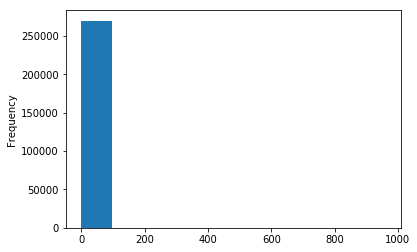

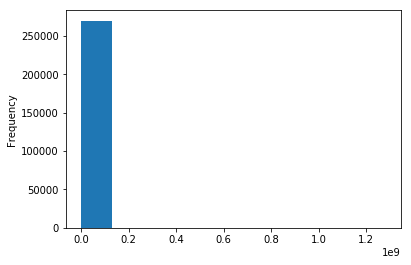

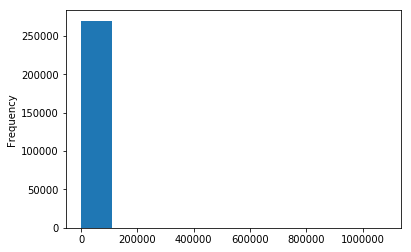

In [191]:
# hisotgrams
# data[data.column > 1000]
data['conn len'].plot('hist')
plt.show()
data['src bytes'].plot('hist')
plt.show()
data['dst bytes'].plot('hist')
plt.show()

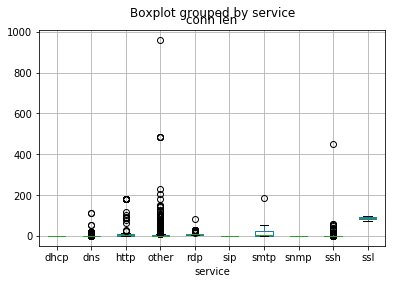

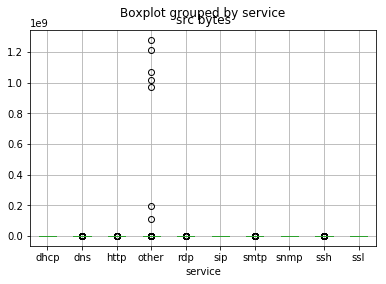

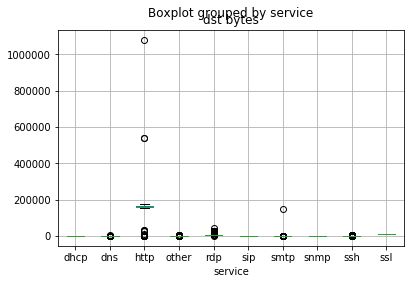

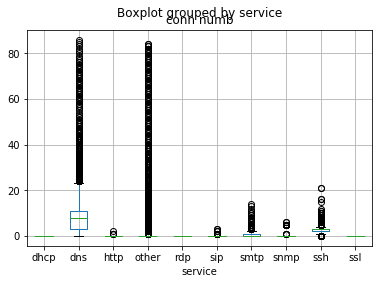

In [192]:
# boxplots
data.boxplot(column='conn len', by='service')
data.boxplot(column='src bytes', by='service')
data.boxplot(column='dst bytes', by='service')
data.boxplot(column='conn numb', by='service')

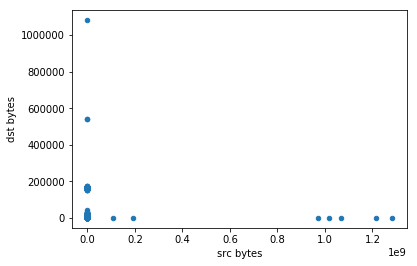

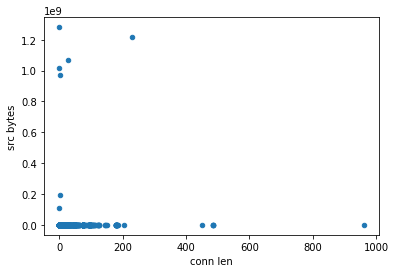

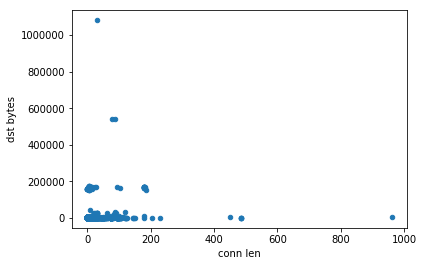

In [193]:
# scatter plots
data.plot.scatter(x='src bytes', y= 'dst bytes')
data.plot.scatter(x='conn len', y= 'src bytes')
data.plot.scatter(x='conn len', y= 'dst bytes')

In [194]:
# drop categorical columns

data = data.drop(["service", "Conn state"], axis=1)

## First experiments with algorithms

In [195]:
data.shape

(270075, 36)

In [196]:
data.loc[:, "attack_flag"] = data.loc[:,"attack_flag"].replace(-2, -1)

In [197]:
data["attack_flag"].describe()

count    270075.000000
mean         -0.956382
std           0.292118
min          -1.000000
25%          -1.000000
50%          -1.000000
75%          -1.000000
max           1.000000
Name: attack_flag, dtype: float64

In [198]:
#crossvalidation

from sklearn import model_selection
from sklearn.ensemble import AdaBoostClassifier

sampled_data = data.sample(n=100000, random_state=1)
X = sampled_data.loc[:, sampled_data.columns != 'attack_flag']
Y = sampled_data.loc[:, sampled_data.columns == 'attack_flag']
#X = data.loc[:, data.columns != 'attack_flag']
#Y = data.loc[:, data.columns == 'attack_flag']
seed = 12
num_trees = 2
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
#scoring = ["accuracy"]
#results = model_selection.cross_validate(model, X, Y, cv=kfold, scoring = scoring)
results = model_selection.cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

/home/matz/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/matz/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/matz/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/matz/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

0.97828


/home/matz/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/matz/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [206]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

X = sampled_data.loc[:, sampled_data.columns != 'attack_flag']
y = sampled_data.loc[:, sampled_data.columns == 'attack_flag'].values.ravel()
sampled_data = data.sample(n=100000, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

seed = 12

# wykres po num_trees od 2-40 co 2 dla przykładu

num_trees = 36
kfold = model_selection.KFold(n_splits=10, random_state=seed)
clf = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)

model = clf.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1-score:",metrics.f1_score(y_test, y_pred, average=None)[0])
print("Precision:",metrics.precision_score(y_test, y_pred, average=None)[0])
print("Recall:",metrics.recall_score(y_test, y_pred, average=None)[0])
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
fpr = fp/(fp+tn)
roc_auc = metrics.roc_auc_score(y_test, y_pred)
print("FPR:", fpr)
print("ROC AUC score:", roc_auc)

Accuracy: 0.9895333333333334
F1-score: 0.9946768834339187
Precision: 0.9907132243684993
Recall: 0.998672385620915
FPR: 0.0013276143790849674
ROC AUC score: 0.7789836287078933
